In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt


# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

In [3]:
X.shape, y.shape

(torch.Size([50, 1]), torch.Size([50, 1]))

In [4]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)


(40, 40, 10, 10)

In [5]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

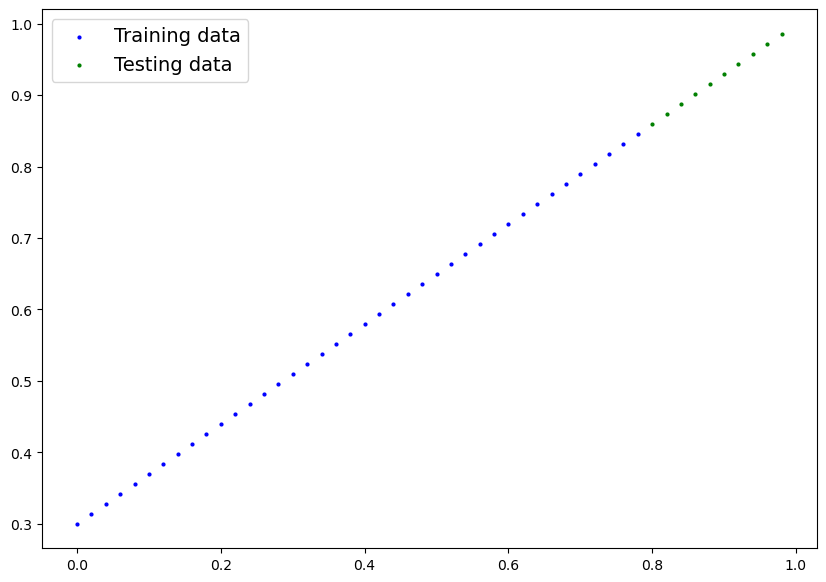

In [6]:
plot_predictions()

In [7]:
class LinearMod(nn.Module):
  def __init__(self):
    super().__init__()
    self.ly = nn.Linear(in_features = 1, out_features = 1)

  def forward(self, x):
    return self.ly(x)

In [8]:
# Create a Linear Regression model class
class LinearRegressionModel(
        nn.Module):  # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(
      torch.randn(1,  # <- start with random weights (this will get adjusted as the model learns)
                  dtype = torch.float),  # <- PyTorch loves float32 by default
      requires_grad = True)  # <- can we update this value with gradient descent?)

    self.bias = nn.Parameter(
      torch.randn(1,  # <- start with random bias (this will get adjusted as the model learns)
                  dtype = torch.float),  # <- PyTorch loves float32 by default
      requires_grad = True)  # <- can we update this value with gradient descent?))

  # Forward defines the computation in the model
  def forward(self,
              x: torch.Tensor) -> torch.Tensor:  # <- "x" is the input data (e.g. training/testing features)
    return self.weights * x + self.bias  # <- this is the linear regression formula (y = m*x + b)

In [10]:
model = LinearRegressionModel()


LinearRegressionModel()

In [13]:
list(model.parameters())

[Parameter containing:
 tensor([-0.4717], requires_grad=True),
 Parameter containing:
 tensor([-1.1121], requires_grad=True)]

In [14]:
model.state_dict()

OrderedDict([('weights', tensor([-0.4717])), ('bias', tensor([-1.1121]))])

In [15]:
with torch.inference_mode():
  y_hat = model(X_test)

print(y_hat)

tensor([[-1.4895],
        [-1.4989],
        [-1.5083],
        [-1.5178],
        [-1.5272],
        [-1.5366],
        [-1.5461],
        [-1.5555],
        [-1.5649],
        [-1.5744]])


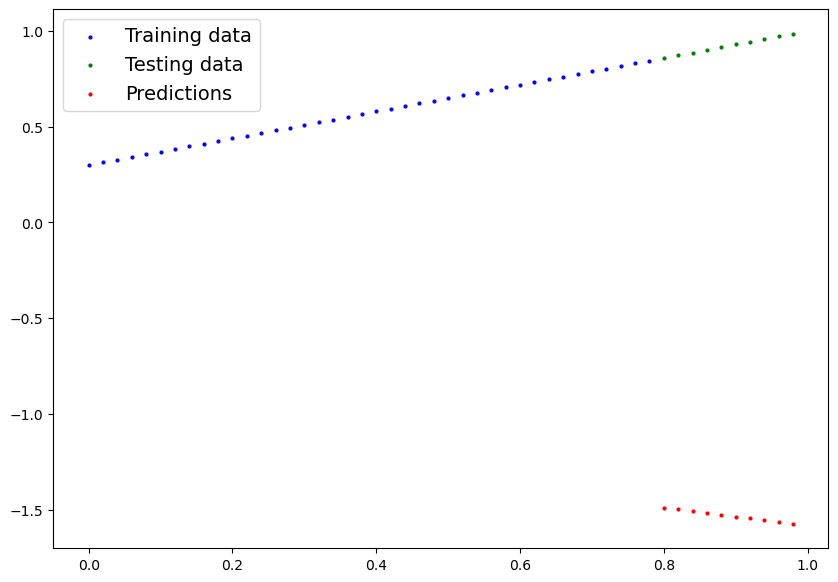

In [16]:
plot_predictions(predictions = y_hat)

In [18]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model.parameters(), lr = 0.01)


In [27]:
epochs = 50000

train_loss_values = []
test_loss_values = []
epoch_count = []

for i in range(1, epochs + 1):
  model.train()
  y_hat = model(X_train)
  loss = loss_fn(y_hat, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model.eval()
  with torch.inference_mode():
    y_infer = model(X_test)
    test_loss = loss_fn(y_infer, y_test.to(torch.float))

    if i % 10 == 0:
      epoch_count.append(i)
      train_loss_values.append(loss.detach().numpy())
      test_loss_values.append(test_loss.detach().numpy())
      print(f"Epoch: {i} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss}")

Epoch: 10 | MAE Train Loss: 0.00726689537987113 | MAE Test Loss: 0.008254820480942726
Epoch: 20 | MAE Train Loss: 0.00726689537987113 | MAE Test Loss: 0.008254820480942726
Epoch: 30 | MAE Train Loss: 0.00726689537987113 | MAE Test Loss: 0.008254820480942726
Epoch: 40 | MAE Train Loss: 0.00726689537987113 | MAE Test Loss: 0.008254820480942726
Epoch: 50 | MAE Train Loss: 0.00726689537987113 | MAE Test Loss: 0.008254820480942726
Epoch: 60 | MAE Train Loss: 0.00726689537987113 | MAE Test Loss: 0.008254820480942726
Epoch: 70 | MAE Train Loss: 0.00726689537987113 | MAE Test Loss: 0.008254820480942726
Epoch: 80 | MAE Train Loss: 0.00726689537987113 | MAE Test Loss: 0.008254820480942726
Epoch: 90 | MAE Train Loss: 0.00726689537987113 | MAE Test Loss: 0.008254820480942726
Epoch: 100 | MAE Train Loss: 0.00726689537987113 | MAE Test Loss: 0.008254820480942726
Epoch: 110 | MAE Train Loss: 0.00726689537987113 | MAE Test Loss: 0.008254820480942726
Epoch: 120 | MAE Train Loss: 0.00726689537987113 | M

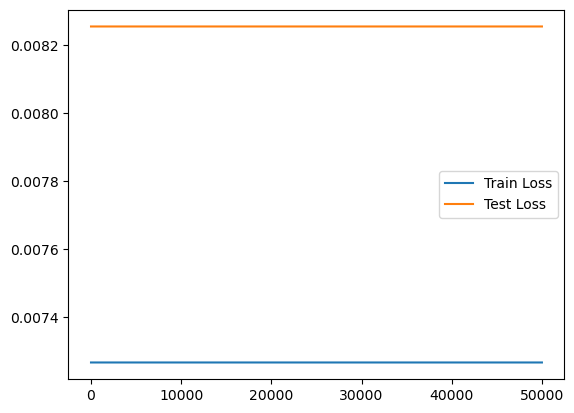

In [31]:
plt.plot(epoch_count, train_loss_values, label = "Train Loss")
plt.plot(epoch_count, test_loss_values, label = "Test Loss")
plt.legend()
plt.show()

In [32]:
model.state_dict()

OrderedDict([('weights', tensor([0.6920])), ('bias', tensor([0.2989]))])

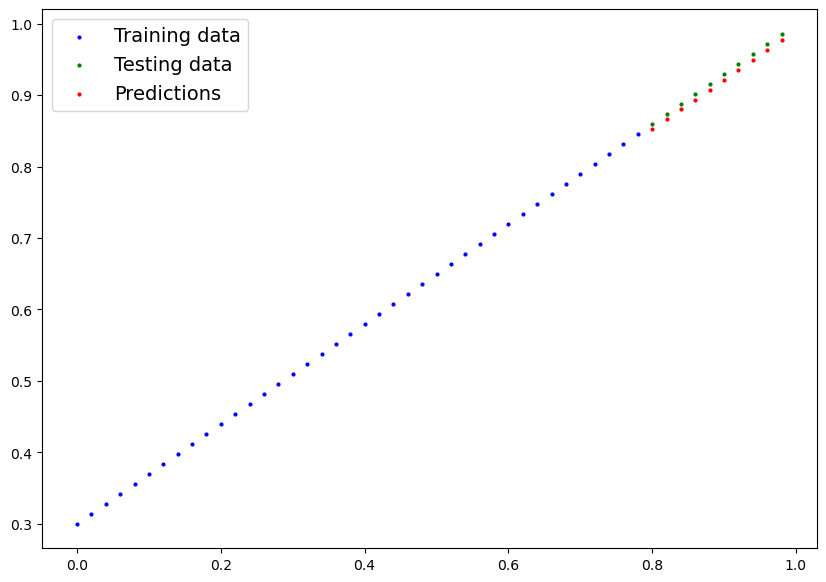

In [35]:
plot_predictions(predictions = model(X_test).detach())

In [40]:
from pathlib import Path

ModelPath = Path("Model")
ModelPath.mkdir(parents = True, exist_ok = True)
ModelName = "model01.pth"
save_path = ModelPath / ModelName

print(f"Saving model to {save_path}")
torch.save(model.state_dict(), save_path)
print(f"{ModelName} saved succesfully.")

Saving model to Model/model01.pth
model01.pth saved succesfully.


In [42]:
from pathlib import Path
import requests

# the filepath of the data
DATA_PATH = Path("data/Mnist")
DATA_PATH.mkdir(parents = True, exist_ok = True)

URL = "https://github.com/pytorch/tutorials/raw/main/_static/"
FILENAME = "mnist.pkl.gz"

if not (DATA_PATH).exists():
        content = requests.get(URL + FILENAME).content
        (DATA_PATH).open("wb").write(content)


In [45]:
import pickle
import gzip

with gzip.open((DATA_PATH / FILENAME).as_posix(), "rb") as f:
        ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

FileNotFoundError: [Errno 2] No such file or directory: 'data/Mnist/mnist.pkl.gz'

In [46]:
def log_softmax(x):
    return x - x.exp().sum(-1).log().unsqueeze(-1)


In [64]:
x = torch.tensor([1, 2, 3])
x - x.exp().sum(-1).log().unsqueeze(0), log_softmax(x)


(tensor([-2.4076, -1.4076, -0.4076]), tensor([-2.4076, -1.4076, -0.4076]))

In [66]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets


In [67]:
# import MNIST from torchvision
import torchvision.transforms as transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                                ])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download = True, train = True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)

# Download and load the test data
testset = datasets.MNIST('~/.pytorch/MNIST_data/', download = True, train = False, transform = transform)
testloader = torch.utils.data.DataLoader(testset, batch_size = 64, shuffle = True)


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /Users/lipeiran/.pytorch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to /Users/lipeiran/.pytorch/MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /Users/lipeiran/.pytorch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to /Users/lipeiran/.pytorch/MNIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /Users/lipeiran/.pytorch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /Users/lipeiran/.pytorch/MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /Users/lipeiran/.pytorch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /Users/lipeiran/.pytorch/MNIST_data/MNIST/raw



In [68]:
x = torch.randn(3, 4)

log_softmax(x)

tensor([[-4.3034, -2.2014, -1.6661, -0.3757],
        [-1.6502, -1.2858, -3.8486, -0.6729],
        [-0.8805, -2.4223, -1.8391, -1.0854]])

In [72]:
x.exp().sum(-1).log().unsqueeze(-1).shape

torch.Size([3, 1])